In [28]:
import pandas as pd
import seaborn
from matplotlib import pyplot as plt


In [29]:
path = './data/final_data.csv'
data = pd.read_csv(path)

data['ID'] = (data['ID'] - 14) * 100
# data['ID'] = data['ID'].astype(int)
data['time'] = pd.to_datetime(data['time'])
data['weekday'] = data['time'].dt.weekday
# 指定日期
specified_date = pd.to_datetime('2014-03-01')

# 计算日期与指定日期之间的天数差
data['time'] = (data['time'] - specified_date).dt.days
print(data.dtypes)

Unnamed: 0                int64
ID                      float64
time                      int64
mood                    float64
circumplex.arousal      float64
circumplex.valence      float64
activity                float64
screen                  float64
call                    float64
sms                     float64
appCat.builtin          float64
appCat.communication    float64
appCat.entertainment    float64
appCat.finance          float64
appCat.game             float64
appCat.office           float64
appCat.other            float64
appCat.social           float64
appCat.travel           float64
appCat.unknown          float64
appCat.utilities        float64
appCat.weather          float64
mood_class                int64
weekday                   int32
dtype: object


In [30]:
# 计算 Pearson 相关系数
pearson_corr = data.corr(method='pearson')
print("Pearson 相关系数:")
print(pearson_corr)

# 计算 Spearman 相关系数
spearman_corr = data.corr(method='spearman')
print("\nSpearman 相关系数:")
print(spearman_corr)

Pearson 相关系数:
                      Unnamed: 0        ID      time      mood  \
Unnamed: 0              1.000000  0.997535  0.372573  0.170609   
ID                      0.997535  1.000000  0.349898  0.169282   
time                    0.372573  0.349898  1.000000  0.003664   
mood                    0.170609  0.169282  0.003664  1.000000   
circumplex.arousal      0.094120  0.092075 -0.031170  0.152953   
circumplex.valence     -0.022448 -0.024606 -0.045308  0.684364   
activity               -0.006689  0.007923 -0.088918  0.172094   
screen                  0.122086  0.137688  0.012653  0.044452   
call                    0.037725  0.038772  0.047913  0.031858   
sms                     0.003304  0.002286  0.013844 -0.017278   
appCat.builtin          0.064830  0.073057  0.022774 -0.047249   
appCat.communication   -0.083612 -0.065586 -0.074649  0.053590   
appCat.entertainment   -0.082615 -0.086009 -0.121646  0.106937   
appCat.finance         -0.034318 -0.030258  0.053629 -0.015219

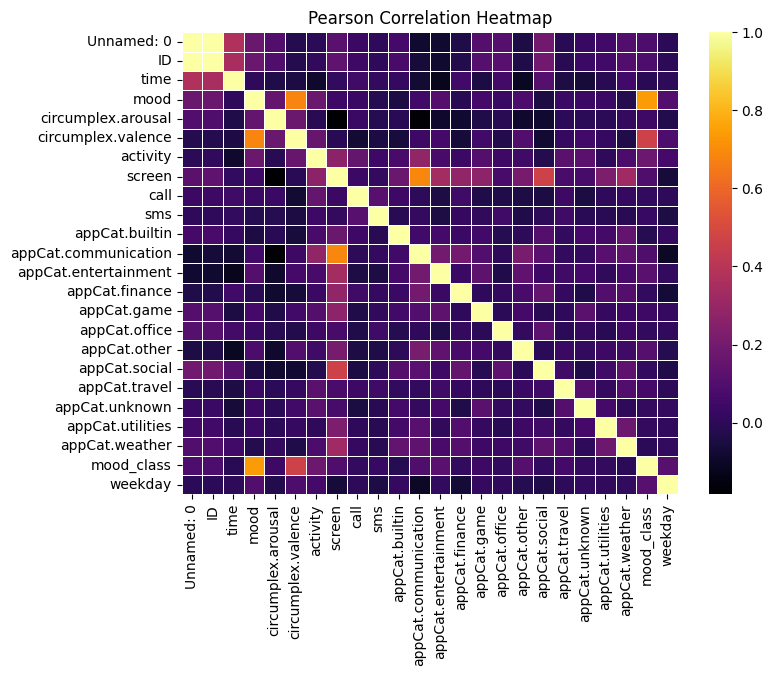

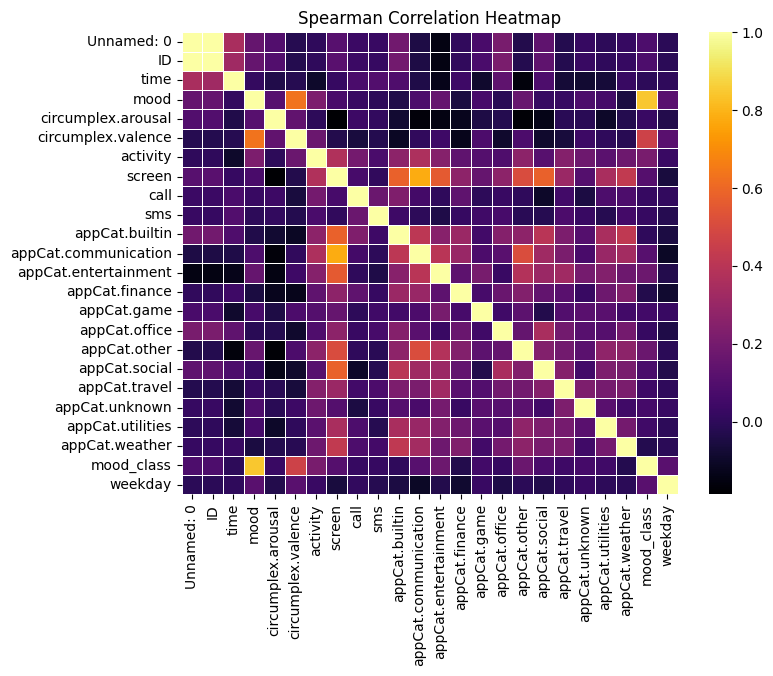

In [32]:

# 绘制热力图
plt.figure(figsize=(8, 6))
seaborn.heatmap(pearson_corr, annot=False, cmap='inferno', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()


plt.figure(figsize=(8, 6))
seaborn.heatmap(spearman_corr, annot=False, cmap='inferno', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Heatmap')
plt.show()